In [89]:
from datetime import datetime
import datetime as dt
import pandas_datareader as web
from pandas_datareader.data import DataReader
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# sns.set_style('whitegrid')
# plt.style.use('fivethirtyeight')
%matplotlib inline

YEARS = 17

techlist = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - YEARS, end.month, end.day)

for stock in techlist:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# EDA

In [90]:
companies = [AAPL, GOOG, MSFT, AMZN]
company_names = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

for x, y in zip(companies, company_names):
    x['company_names'] = y

df = pd.concat(companies, axis=0)
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_names
Date,,,,,,,
2005-06-30,1.307500,1.327143,1.296786,1.314643,1.124043,418390000,APPLE
2005-07-01,1.315357,1.320357,1.296071,1.303571,1.114576,250000800,APPLE
2005-07-05,1.305357,1.362500,1.303571,1.356429,1.159771,454269200,APPLE
2005-07-06,1.346786,1.362857,1.328571,1.335357,1.141754,394626400,APPLE
2005-07-07,1.314643,1.348571,1.314286,1.343929,1.149083,383723200,APPLE


In [68]:
df.shape

(21103, 7)

In [4]:
# AAPL.describe()
# GOOG.describe()
# MSFT.describe()
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3777.000000,3777.000000,3777.000000,3777.000000,3777.000000,3.777000e+03
mean,47.936360,48.471183,47.337461,47.913538,47.913538,1.047307e+08
std,53.055990,53.657793,52.369738,53.004406,53.004406,7.514421e+07
min,1.764500,1.950000,1.734000,1.751500,1.751500,1.762600e+07
25%,9.014500,9.157000,8.909500,9.010500,9.010500,5.982600e+07
50%,18.754999,18.950001,18.633499,18.755501,18.755501,8.487000e+07
75%,84.000000,84.995003,83.049004,83.727997,83.727997,1.265840e+08
max,187.199997,188.654007,184.839493,186.570496,186.570496,1.209048e+09


In [5]:
# AAPL.info()
# GOOG.info()
# MSFT.info()
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3777 entries, 2007-07-02 to 2022-06-30
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           3777 non-null   float64
 1   High           3777 non-null   float64
 2   Low            3777 non-null   float64
 3   Close          3777 non-null   float64
 4   Adj Close      3777 non-null   float64
 5   Volume         3777 non-null   int64  
 6   company_names  3777 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 236.1+ KB


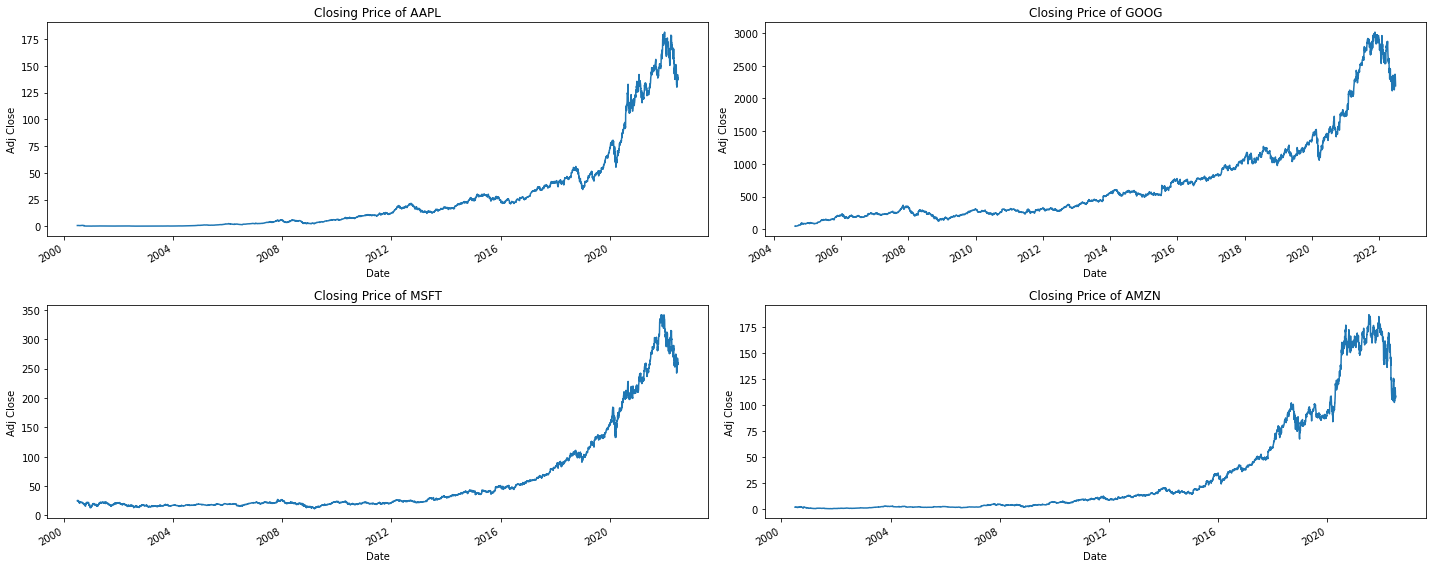

In [69]:
plt.figure(figsize=(20,8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, cpn in enumerate(companies, 1):
    plt.subplot(2, 2, i)
    cpn['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.title(f"Closing Price of {techlist[i-1]}")

plt.tight_layout()

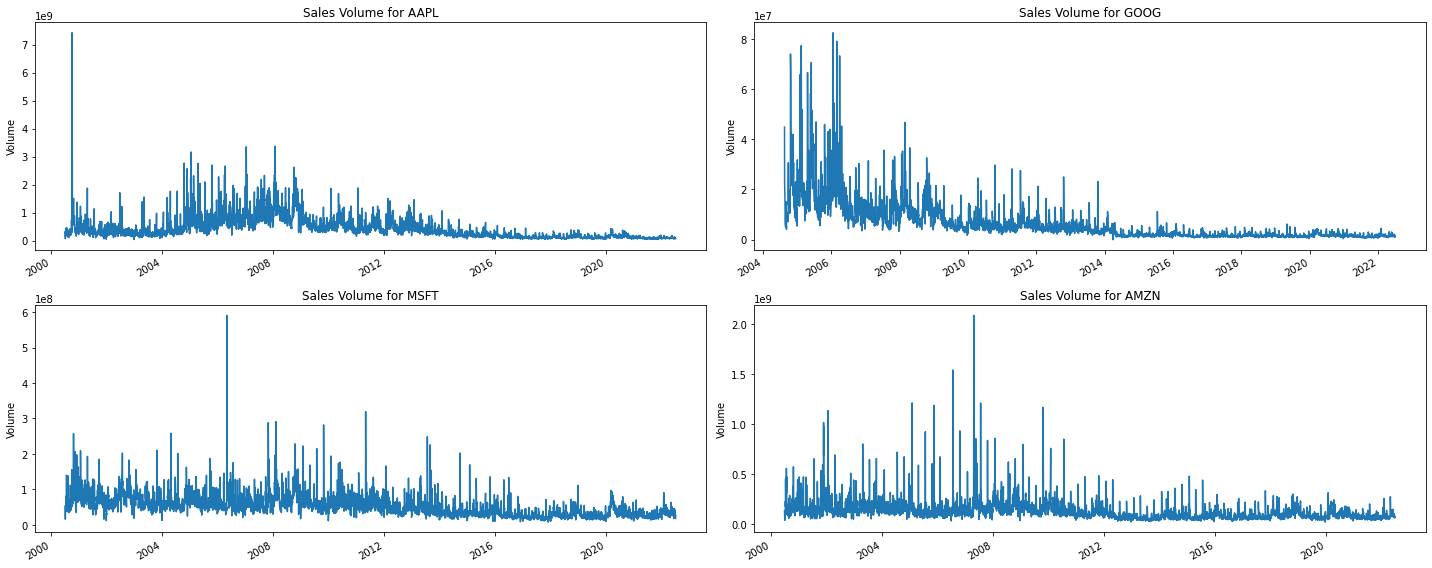

In [70]:
plt.figure(figsize=(20,8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, cpn in enumerate(companies, 1):
    plt.subplot(2, 2, i)
    cpn['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {techlist[i - 1]}")
    
plt.tight_layout()

Moving Average

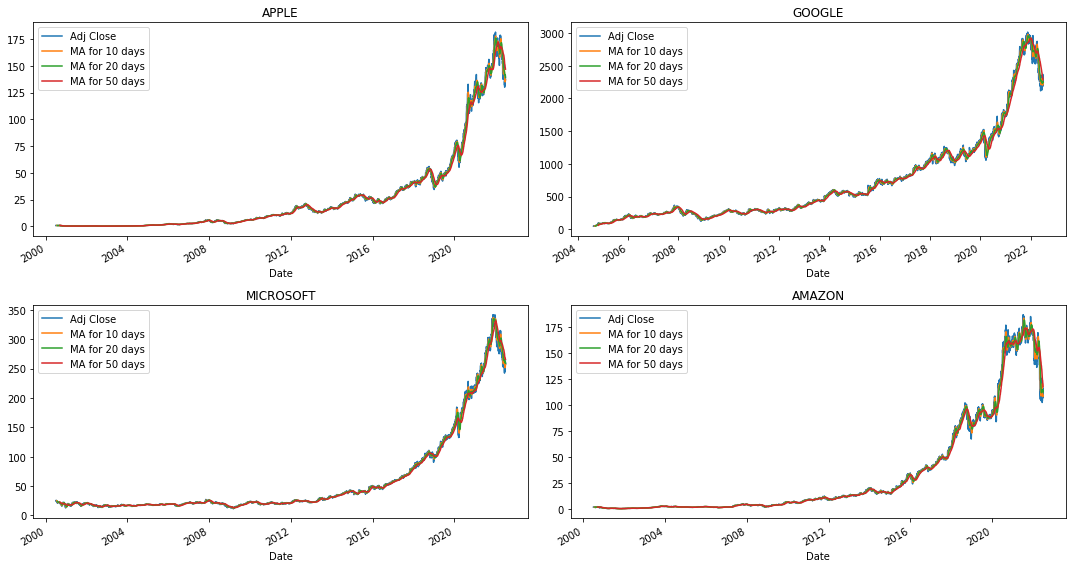

In [71]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in companies:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

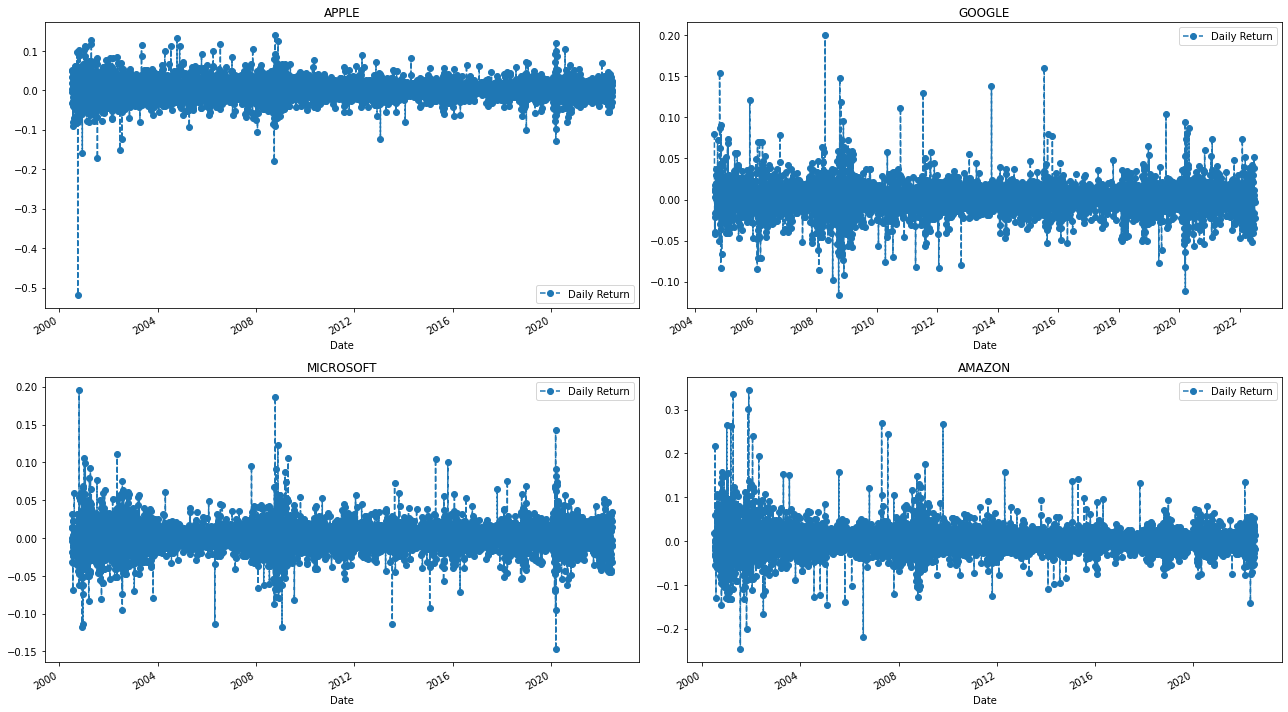

In [72]:
# We'll use pct_change to find the percent change for each day
for company in companies:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(18)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

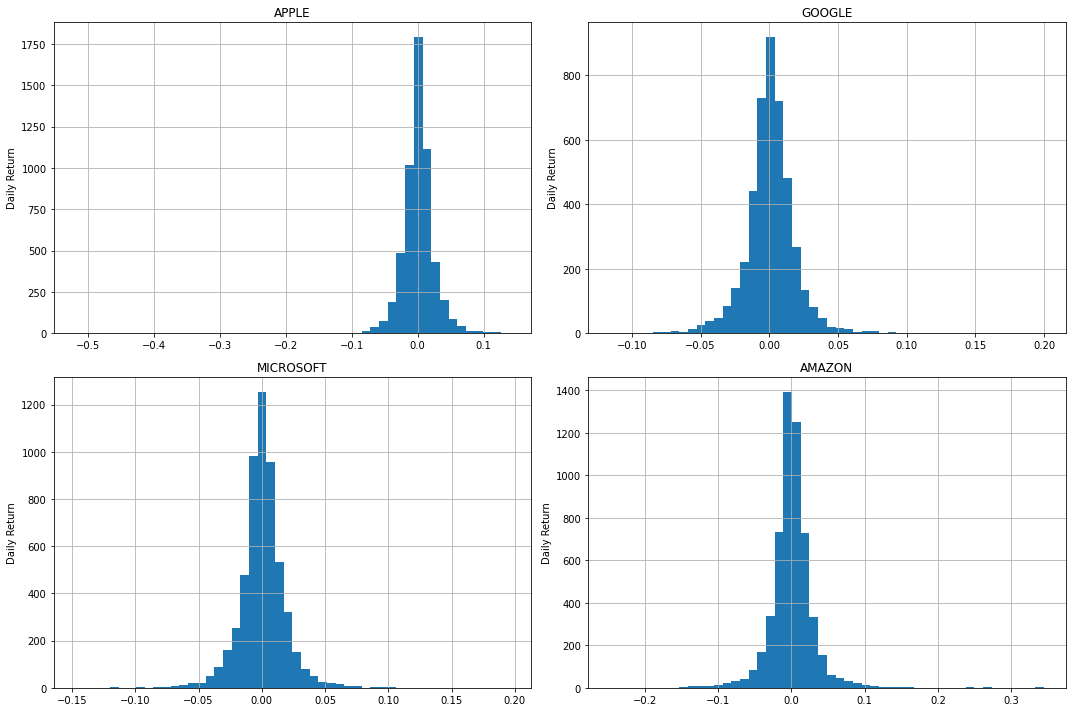

In [73]:
plt.figure(figsize=(15, 10))

for i, cpn in enumerate(companies, 1):
    plt.subplot(2, 2, i)
    cpn['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_names[i - 1]}')
    
plt.tight_layout()

# LSTM

In [148]:
df = DataReader('GOOG', data_source='yahoo', start=datetime(end.year - YEARS, end.month, end.day), end=datetime.now())
data = df.filter(['Close'])
dataset = data.values

train_size = int(np.ceil(len(dataset) * .80))

train_size

3424

In [149]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_dataset = scaler.fit_transform(dataset)
scaled_dataset

array([[0.00633639],
       [0.00583584],
       [0.00660566],
       ...,
       [0.73570142],
       [0.73351841],
       [0.71353188]])

In [150]:
train_data = scaled_dataset[0:int(train_size), :]
prediction_days = 60 #time steps (stamps)

x_train, y_train = [], []

for i in range(prediction_days, len(train_data)):
    x_train.append(train_data[i-prediction_days:i, 0])
    y_train.append(train_data[i, 0])
    if i <= (prediction_days + 1):
        print(x_train)
        print(y_train)
        print()
    

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.00633639, 0.00583584, 0.00660566, 0.00588244, 0.00657631,
       0.00669542, 0.0061983 , 0.00592732, 0.00714937, 0.00749976,
       0.00755154, 0.00726674, 0.00905495, 0.00941742, 0.00975228,
       0.0077604 , 0.00662982, 0.00667125, 0.00681624, 0.0062242 ,
       0.00523343, 0.00589797, 0.00720633, 0.00688011, 0.00695432,
       0.0060257 , 0.00583584, 0.00589107, 0.00487441, 0.00459306,
       0.00557175, 0.00458444, 0.00486923, 0.0047743 , 0.00389228,
       0.00389401, 0.00286009, 0.00382151, 0.0043376 , 0.00434106,
       0.00451194, 0.00535253, 0.00514886, 0.00492965, 0.0049728 ,
       0.00535253, 0.00512124, 0.00646067, 0.00655042, 0.00718907,
       0.00902733, 0.00936219, 0.00786396, 0.00779837, 0.00738066,
       0.00800032, 0.00871146, 0.00940016, 0.00930868, 0.00999738])]
[0.009810968845030181]

[array([0.00633639, 0.00583584, 0.00660566, 0.00588244, 0.00657631,
       0.00669542, 0.0061983 , 0.00592732, 0.00714937, 0.00749976,
       0.00755154, 0.00726674, 0.0

In [178]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping

DROPOUT_UNIT = 0.2

def LSTM_Exp():
    model = Sequential()

    model.add(LSTM(units = 128, return_sequences=True, input_shape = (x_train.shape[1], 1)))
    model.add(Dropout(DROPOUT_UNIT))

    model.add(LSTM(units = 64, return_sequences= True))
    model.add(Dropout(DROPOUT_UNIT))

    model.add(LSTM(units= 64, return_sequences= True))
    model.add(Dropout(DROPOUT_UNIT))

    model.add(LSTM(units= 64, return_sequences= True))
    model.add(Dropout(DROPOUT_UNIT))
    
    model.add(LSTM(units = 64))
    model.add(Dropout(DROPOUT_UNIT))

    model.add(Dense(units=1))

    return model

In [179]:
model = LSTM_Exp()
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error')

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_43 (LSTM)              (None, 60, 128)           66560     
                                                                 
 dropout_43 (Dropout)        (None, 60, 128)           0         
                                                                 
 lstm_44 (LSTM)              (None, 60, 64)            49408     
                                                                 
 dropout_44 (Dropout)        (None, 60, 64)            0         
                                                                 
 lstm_45 (LSTM)              (None, 60, 64)            33024     
                                                                 
 dropout_45 (Dropout)        (None, 60, 64)            0         
                                                                 
 lstm_46 (LSTM)              (None, 60, 64)          

In [180]:
# checkpoint = ModelCheckpoint(filepath = 'weights_best.hdf5', 
#                                verbose = 2, 
#                                save_best_only = True)
EPOCHS = 50
BATCH_SIZE = 32

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/50
106/106 [==============================] - 12s 62ms/step - loss: 0.0013
Epoch 2/50
106/106 [==============================] - 6s 60ms/step - loss: 2.8465e-04
Epoch 3/50
106/106 [==============================] - 7s 61ms/step - loss: 2.9374e-04
Epoch 4/50
106/106 [==============================] - 7s 63ms/step - loss: 2.7451e-04
Epoch 5/50
106/106 [==============================] - 7s 61ms/step - loss: 2.4362e-04
Epoch 6/50
106/106 [==============================] - 7s 62ms/step - loss: 2.2153e-04
Epoch 7/50
106/106 [==============================] - 6s 61ms/step - loss: 2.3011e-04
Epoch 8/50
106/106 [==============================] - 7s 62ms/step - loss: 2.6758e-04
Epoch 9/50
106/106 [==============================] - 7s 63ms/step - loss: 2.7567e-04
Epoch 10/50
106/106 [==============================] - 7s 61ms/step - loss: 2.1077e-04
Epoch 11/50
106/106 [==============================] - 7s 64ms/step - loss: 2.1214e-04
Epoch 12/50
106/106 [==============================] - 

In [181]:
test_data = scaled_dataset[train_size - prediction_days: , :]
x_test = []
y_test = dataset[train_size:, :]
for i in range(prediction_days, len(test_data)):
    x_test.append(test_data[i-prediction_days:i, 0])


x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

661.396862313616

In [182]:
# Plot the data
train = data[:train_size]
valid = data[train_size:]
valid['Predictions'] = predictions

C:\Users\ADRIC\AppData\Local\Temp\ipykernel_26636\764954721.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


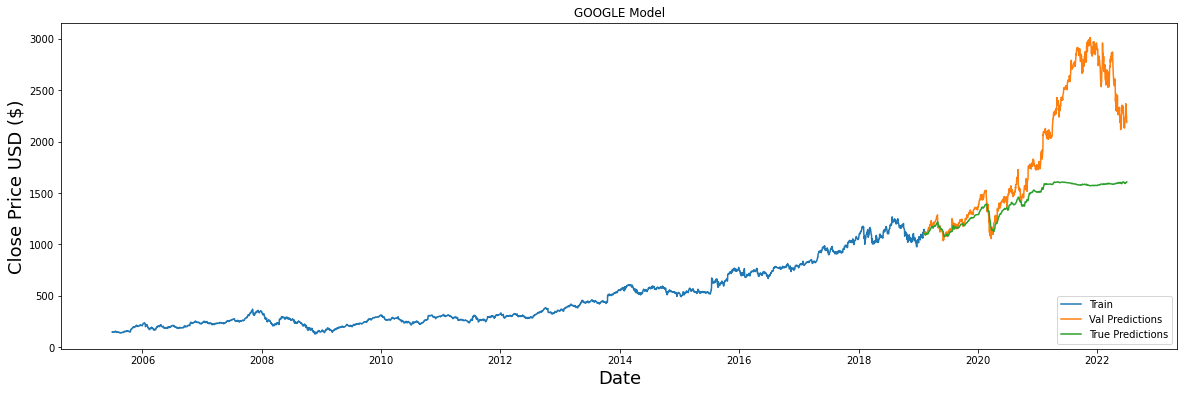

In [183]:
plt.figure(figsize=(20,6))
plt.title('GOOGLE Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val Predictions', 'True Predictions'], loc='lower right')
plt.show()

In [184]:
print(len(train))
print(len(valid))
print(len(train) + len(valid))
print(len(data))

3424
856
4280
4280


In [170]:
train

,Close
Date,
2005-06-30,146.525787
2005-07-01,145.081207
2005-07-05,147.302872
2005-07-06,145.215698
2005-07-07,147.218185
...,...
2019-01-31,1116.369995
2019-02-01,1110.750000
2019-02-04,1132.800049


In [171]:
valid

,Close,Predictions
Date,,
2019-02-07,1098.709961,1097.881348
2019-02-08,1095.060059,1092.583740
2019-02-11,1095.010010,1083.277344
2019-02-12,1121.369995,1075.146851
2019-02-13,1120.160034,1075.306396
...,...,...
2022-06-24,2370.760010,2103.804688
2022-06-27,2332.449951,2134.147705
2022-06-28,2251.429932,2157.788574
